In [1]:
#PARAMETERS
BATCH_SIZE = 14
NUM_EPOCHS = 3
LEARNING_RATE = 0.005
TRAIN_PERCENTAGE = .8

In [2]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import transforms
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader
from torch.optim import SGD
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
#from engine import train_one_epoch, evaluate

import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import functional as F
from torch.utils.data import Dataset, DataLoader
import json
import PIL.Image

In [3]:
%%cmd
git clone https://github.com/pytorch/vision.git

Microsoft Windows [Version 10.0.19045.3086]
(c) Microsoft Corporation. Alle Rechte vorbehalten.

(DV-STA) c:\GIT_Workspaces\Deep-Vision-sta\Faster R-CNN>git clone https://github.com/pytorch/vision.git


fatal: destination path 'vision' already exists and is not an empty directory.



(DV-STA) c:\GIT_Workspaces\Deep-Vision-sta\Faster R-CNN>

In [4]:
import shutil

shutil.copy("vision/references/detection/utils.py", "./")
shutil.copy("vision/references/detection/transforms.py", "./")
shutil.copy("vision/references/detection/coco_eval.py", "./")
shutil.copy("vision/references/detection/engine.py", "./")
shutil.copy("vision/references/detection/coco_utils.py", "./")

'./coco_utils.py'

In [5]:
import cv2
from IPython.display import display, Image

def draw_annotation(image_path, annotation):
    # Load the image
    image = cv2.imread(image_path)
    
    # Extract the annotation details
    filename = annotation["FileName"]
    annotations = annotation["Annotations"]
    
    # Process each annotation
    for annot in annotations:
        bounding_box = annot["BoundingBox"]
        class_name = annot["classname"]
        
        # Draw the bounding box
        x_min, y_min, x_max, y_max = bounding_box
        print(x_min, y_min, x_max, y_max)
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        
        # Add the class label
        text = f"{class_name}"
        cv2.putText(image, text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        #make a dot at x_min, y_min and x_max, y_max
        cv2.circle(image, (x_min, y_min), 5, (0, 0, 255), -1)
        cv2.circle(image, (x_max, y_max), 5, (255, 0, 0), -1)
    
    # Save the image with annotations
    annotated_image_path = "annotated_image.jpg"
    cv2.imwrite(annotated_image_path, image)
    
    # Display the image in the notebook
    display(Image(filename=annotated_image_path))


In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_sample(dataloader, x):
    # Rufen Sie das x-te Element aus dem Dataloader ab
    images, annotations = next(iter(dataloader))
    image = images[x]
    boxes = annotations[x]['annotations']

    # Erstellen Sie eine neue Figur und Achse
    fig, ax = plt.subplots(1)

    # Zeigen Sie das Bild in der Achse an
    ax.imshow(image.permute(1, 2, 0))

    # Iterieren Sie über die Bounding Boxes und zeichnen Sie sie als Rechtecke in der Achse
    for box in boxes:
        x_min, y_min, x_max, y_max = box['bbox']
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)


    # Zeigen Sie die visualisierten Bounding Boxes an
    plt.show()

In [7]:
CLASS_LABELS = {
    "hijab_niqab": 0,
    "mask_colorful": 1,
    "mask_surgical": 2,
    "face_no_mask": 3,
    "face_with_mask_incorrect": 4,
    "face_with_mask": 5,
    "face_other_covering": 6,
    "scarf_bandana": 7,
    "balaclava_ski_mask": 8,
    "face_shield": 9,
    "other": 10,
    "gas_mask": 11,
    "turban": 12,
    "helmet": 13,
    "sunglasses": 14,
    "eyeglasses": 15,
    "hair_net": 16,
    "hat": 17,
    "goggles": 18,
    "hood": 19
}

{'FileName': '2006.jpg', 'NumOfAnno': 4, 'Annotations': [{'isProtected': False, 'ID': 280459329561863488, 'BoundingBox': [276, 145, 377, 255], 'classname': 'face_with_mask', 'Confidence': 1, 'Attributes': {}}, {'isProtected': False, 'ID': 239543555427487392, 'BoundingBox': [207, 50, 310, 178], 'classname': 'face_with_mask', 'Confidence': 1, 'Attributes': {}}, {'isProtected': False, 'ID': 442800710251389568, 'BoundingBox': [287, 188, 364, 245], 'classname': 'mask_surgical', 'Confidence': 1, 'Attributes': {}}, {'isProtected': False, 'ID': 293325675214463168, 'BoundingBox': [219, 96, 303, 169], 'classname': 'mask_surgical', 'Confidence': 1, 'Attributes': {}}]}
276 145 377 255
207 50 310 178
287 188 364 245
219 96 303 169


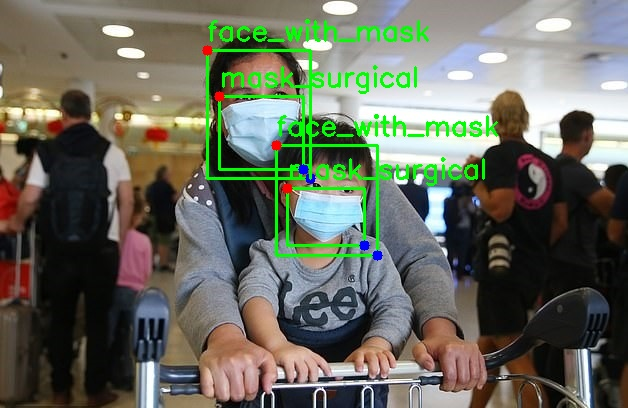

In [8]:
number = 2006


image_path = "C:\GIT_Workspaces\Deep-Vision-sta\Datasets\Face Mask Detection Dataset\Medical mask\Medical mask\Medical Mask\images\\{number}.jpg".format(number=number)

#read json file
import json
with open('C:\GIT_Workspaces\Deep-Vision-sta\Datasets\Face Mask Detection Dataset\Medical mask\Medical mask\Medical Mask\\annotations\\{number}.jpg.json'.format(number=number)) as json_file:
    annotation = json.load(json_file)

print(annotation)

draw_annotation(image_path, annotation)

In [9]:
#open the json file at Datasets\Face Mask Detection Dataset\Medical mask\Medical mask\meta.json

import json
with open('C:\GIT_Workspaces\Deep-Vision-sta\Datasets\Face Mask Detection Dataset\Medical mask\Medical mask\meta.json') as json_file:
    meta = json.load(json_file)

#copunt the entries in classes
print(len(meta["classes"]))

20


In [10]:
#iterate through all annotation files and search for invalid bounding boxes
import os
import json
#from PIL import Image

# Get the path to the annotations
annotations_path = "C:\GIT_Workspaces\Deep-Vision-sta\Datasets\Face Mask Detection Dataset\Medical mask\Medical mask\Medical Mask\\annotations"

# Get the path to the images
images_path = "C:\GIT_Workspaces\Deep-Vision-sta\Datasets\Face Mask Detection Dataset\Medical mask\Medical mask\Medical Mask\images"

# Get the list of all annotations
annotation_files = os.listdir(annotations_path)


# # Iterate through each annotation file
# for annotation_file in annotation_files:
#     # Build the path to the annotation file
#     annotation_file_path = os.path.join(annotations_path, annotation_file)
    
#     # Open the annotation file
#     with open(annotation_file_path) as file:
#         # Load the annotation file
#         annotation = json.load(file)
        
#         # Get the image filename
#         image_filename = annotation["FileName"]
        
#         # Build the path to the image file
#         image_file_path = os.path.join(images_path, image_filename)
        
#         # Open the image
#         image = Image.open(image_file_path)
        
#         # Get the image size
#         image_width, image_height = image.size
        
#         # Get the list of annotations
#         annotations = annotation["Annotations"]
        
#         # Iterate through each annotation
#         for annotation in annotations:
#             # Get the bounding box coordinates
#             x_min = annotation["BoundingBox"][0]
#             y_min = annotation["BoundingBox"][1]
#             x_max = annotation["BoundingBox"][2]
#             y_max = annotation["BoundingBox"][3]

#             print(x_min, x_max, y_min, y_max)
            
#             # Check if any coordinate exceeds the image boundaries
#             if x_min > image_width or y_min > image_height or x_max > image_width or y_max > image_height:
#                 print("Invalid bounding box coordinates in file:", image_file_path)
#                 break

#             if x_min > x_max or y_min > y_max:
#                 print("Invalid bounding box coordinates in file:", image_file_path)
                #break

In [11]:
import os
import PIL.Image as Image

import cv2
import numpy as np
import torch
import torchvision.transforms.functional as F
import os
import json
import PIL.Image
import xml.etree.ElementTree as et

class MaskDetectionDataset(Dataset):
    def __init__(self, root_dir, target_size=(600, 900)):
        self.root_dir = root_dir
        self.annotations = []
        self.target_size = target_size
        self.load_annotations()

    def load_annotations(self):
        annotation_files = os.listdir(f"{self.root_dir}/annotations")
        for file_name in annotation_files:
            with open(f"{self.root_dir}/annotations/{file_name}", "r") as f:
                annotation_data = json.load(f)
                annotations = annotation_data["Annotations"]
                file_name = annotation_data["FileName"]
                self.annotations.append((annotations, file_name))
                # Check if the boxes are valid
                for annotation in annotations:
                    boxes = annotation["BoundingBox"]
                    if boxes[0] >= boxes[2] or boxes[1] >= boxes[3]:
                        print("Invalid bounding box coordinates in file:", file_name)
                        break

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        annotations = self.annotations[idx][0]
        file_name = self.annotations[idx][1]
        image_path = f"{self.root_dir}/images/{file_name}"
        image = PIL.Image.open(image_path).convert("RGB")
        original_image_width, original_image_height = image.size
        image = F.resize(image, self.target_size)
        image = F.to_tensor(image)

        boxes = []
        labels = []
        for annotation in annotations:
            box = annotation["BoundingBox"]
            if box[0] < box[2] and box[1] < box[3]:
                # Resize the bounding box coordinates
                box_resized = [
                    box[0] * self.target_size[0] / original_image_width,
                    box[1] * self.target_size[1] / original_image_height,
                    box[2] * self.target_size[0] / original_image_width,
                    box[3] * self.target_size[1] / original_image_height
                ]
                boxes.append(box_resized)
                class_name = annotation["classname"]
                # Get the class label based on the class name
                class_label = self.get_class_label(class_name)
                labels.append(class_label)

        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["area"] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        target["iscrowd"] = torch.zeros((boxes.shape[0],), dtype=torch.int64)
        target["image_id"] = torch.tensor([idx])

        return image, target

    
    def get_class_label(self, class_name):
        return CLASS_LABELS.get(class_name, -1)  # Return -1 if class_name is not found






In [12]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

In [13]:
dataset = MaskDetectionDataset("C:\GIT_Workspaces\Deep-Vision-sta\Datasets\Face Mask Detection Dataset\Medical mask\Medical mask\Medical Mask",(512,512))

#dataset.annotations[1][0]

dataset.__getitem__(1)

(tensor([[[0.9765, 0.9804, 0.9804,  ..., 0.8196, 0.8471, 0.8706],
          [0.9843, 0.9843, 0.9882,  ..., 0.8510, 0.8784, 0.9020],
          [0.9922, 0.9922, 0.9961,  ..., 0.8980, 0.9255, 0.9451],
          ...,
          [0.7333, 0.7333, 0.7176,  ..., 0.2980, 0.2706, 0.2588],
          [0.7294, 0.7333, 0.7216,  ..., 0.2784, 0.2588, 0.2471],
          [0.7255, 0.7333, 0.7294,  ..., 0.2667, 0.2510, 0.2431]],
 
         [[0.9922, 1.0000, 1.0000,  ..., 0.6588, 0.6902, 0.7137],
          [0.9922, 1.0000, 1.0000,  ..., 0.6941, 0.7216, 0.7451],
          [0.9922, 1.0000, 1.0000,  ..., 0.7412, 0.7725, 0.7922],
          ...,
          [0.6941, 0.6980, 0.6902,  ..., 0.1882, 0.1647, 0.1490],
          [0.6902, 0.6980, 0.6980,  ..., 0.1686, 0.1529, 0.1373],
          [0.6863, 0.7020, 0.7020,  ..., 0.1569, 0.1412, 0.1333]],
 
         [[1.0000, 1.0000, 0.9882,  ..., 0.4157, 0.4471, 0.4706],
          [1.0000, 0.9961, 0.9765,  ..., 0.4471, 0.4784, 0.5020],
          [0.9882, 0.9765, 0.9569,  ...,

In [14]:


# Split the dataset into training and validation sets (adjust the split ratio as needed)
train_size = int(TRAIN_PERCENTAGE * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])


In [15]:
dataset[1]

(tensor([[[0.9765, 0.9804, 0.9804,  ..., 0.8196, 0.8471, 0.8706],
          [0.9843, 0.9843, 0.9882,  ..., 0.8510, 0.8784, 0.9020],
          [0.9922, 0.9922, 0.9961,  ..., 0.8980, 0.9255, 0.9451],
          ...,
          [0.7333, 0.7333, 0.7176,  ..., 0.2980, 0.2706, 0.2588],
          [0.7294, 0.7333, 0.7216,  ..., 0.2784, 0.2588, 0.2471],
          [0.7255, 0.7333, 0.7294,  ..., 0.2667, 0.2510, 0.2431]],
 
         [[0.9922, 1.0000, 1.0000,  ..., 0.6588, 0.6902, 0.7137],
          [0.9922, 1.0000, 1.0000,  ..., 0.6941, 0.7216, 0.7451],
          [0.9922, 1.0000, 1.0000,  ..., 0.7412, 0.7725, 0.7922],
          ...,
          [0.6941, 0.6980, 0.6902,  ..., 0.1882, 0.1647, 0.1490],
          [0.6902, 0.6980, 0.6980,  ..., 0.1686, 0.1529, 0.1373],
          [0.6863, 0.7020, 0.7020,  ..., 0.1569, 0.1412, 0.1333]],
 
         [[1.0000, 1.0000, 0.9882,  ..., 0.4157, 0.4471, 0.4706],
          [1.0000, 0.9961, 0.9765,  ..., 0.4471, 0.4784, 0.5020],
          [0.9882, 0.9765, 0.9569,  ...,

In [16]:
len(dataset)

4326

In [17]:
def collate_fn2(batch):
    images = [item["image"] for item in batch]
    targets = [item["targets"] for item in batch if item["targets"]]

    if targets:
        targets = [{k: v for k, v in target.items()} for target in targets]  # Remove the "to(device)" part
        return {
            "image": torch.stack(images),
            "targets": targets
        }
    else:
        return {
            "image": torch.stack(images),
            "targets": []  # Return an empty list if targets is empty
        }

In [18]:
import utils

train_data_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=utils.collate_fn)
val_data_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=utils.collate_fn)

In [19]:
#get the first batch
out = next(iter(train_data_loader))

out

((tensor([[[0.2784, 0.2824, 0.2863,  ..., 0.6902, 0.6863, 0.6784],
           [0.2902, 0.2941, 0.2941,  ..., 0.6941, 0.6863, 0.6784],
           [0.3020, 0.3059, 0.3098,  ..., 0.6980, 0.6902, 0.6784],
           ...,
           [0.0392, 0.0431, 0.0471,  ..., 0.7294, 0.6941, 0.6627],
           [0.0431, 0.0431, 0.0431,  ..., 0.7255, 0.6941, 0.6627],
           [0.0431, 0.0431, 0.0471,  ..., 0.7216, 0.6902, 0.6549]],
  
          [[0.1882, 0.1922, 0.2000,  ..., 0.6471, 0.6471, 0.6431],
           [0.1961, 0.1961, 0.2039,  ..., 0.6510, 0.6471, 0.6431],
           [0.2000, 0.2039, 0.2078,  ..., 0.6510, 0.6471, 0.6431],
           ...,
           [0.0353, 0.0392, 0.0431,  ..., 0.7451, 0.7176, 0.6980],
           [0.0392, 0.0392, 0.0392,  ..., 0.7451, 0.7176, 0.6980],
           [0.0392, 0.0392, 0.0431,  ..., 0.7412, 0.7137, 0.6941]],
  
          [[0.1529, 0.1529, 0.1569,  ..., 0.6667, 0.6667, 0.6667],
           [0.1608, 0.1608, 0.1608,  ..., 0.6667, 0.6667, 0.6667],
           [0.1647, 0.

In [20]:
dataset.__len__()

4326

In [21]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
num_classes = 20
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

c:\Users\johan\.conda\envs\DV-STA\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\johan\.conda\envs\DV-STA\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=LEARNING_RATE, momentum=0.9, weight_decay=0.0005)

# Learning rate scheduler (optional)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [23]:
#deleteme
import torchvision.models.detection as detection

#criterion = detection.fasterrcnn_loss



In [24]:
import time
import torchvision.models.detection as detection


def train(model, data_loader, optimizer, device):
    model.train()
    total_iterations = len(data_loader)
    start_time = time.time()
    for iteration, batch in enumerate(data_loader, 1):
        images = batch["image"]
        targets = batch["targets"]
        #print(targets)

        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in target.items()} for target in targets]

        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        losses.backward()
        optimizer.step()

        elapsed_time = time.time() - start_time
        avg_time_per_iteration = elapsed_time / iteration
        remaining_iterations = total_iterations - iteration
        eta = avg_time_per_iteration * remaining_iterations

        print(f"Iteration: {iteration}/{total_iterations}, Remaining: {remaining_iterations}, ETA: {eta:.2f} seconds, Loss: {losses:.4f}", end="\r")




#EVAL RETurNT ANDERE WERTE GOOGELN
#auch checken im dataset welche klassen zgeordnet werden und wieviele klassen angegeben werden
def validate(model, data_loader, device):
    model.eval()
    total_loss = 0.0
    #criterion = torch.nn.CrossEntropyLoss()  # Use appropriate loss function
    # Get the criterion (loss function)
    criterion = detection.fasterrcnn_loss

    with torch.no_grad():
        for batch in data_loader:
            images = batch["image"]
            targets = batch["targets"]

            images = [img.to(device) for img in images]
            labels = [target['labels'].to(device) for target in targets]

            outputs = model(images)
            predicted_labels = [output['labels'] for output in outputs]
            predicted_labels = torch.cat(predicted_labels)

            # Flatten the ground truth labels and convert them to 'Long' type
            flattened_labels = torch.cat(labels)
            flattened_labels = flattened_labels.long()

            loss = criterion(outputs['labels'], flattened_labels)
            total_loss += loss.item()

    average_loss = total_loss / len(data_loader)
    return average_loss




In [25]:
# from typing import Tuple, List, Dict, Optional
# import torch
# from torch import Tensor
# from collections import OrderedDict
# from torchvision.models.detection.roi_heads import fastrcnn_loss
# from torchvision.models.detection.rpn import concat_box_prediction_layers
# def eval_forward(model, images, targets):
#     """
#     Args:
#         images (list[Tensor]): images to be processed
#         targets (list[Dict[str, Tensor]]): ground-truth boxes present in the image (optional)
#     Returns:
#         result (list[BoxList] or dict[Tensor]): the output from the model.
#             It returns list[BoxList] contains additional fields
#             like `scores`, `labels` and `mask` (for Mask R-CNN models).
#     """
#     model.eval()

#     original_image_sizes: List[Tuple[int, int]] = []
#     for img in images:
#         val = img.shape[-2:]
#         assert len(val) == 2
#         original_image_sizes.append((val[0], val[1]))

#     images, targets = model.transform(images, targets)

#     # Check for degenerate boxes
#     # TODO: Move this to a function
#     if targets is not None:
#         for target_idx, target in enumerate(targets):
#             boxes = target["boxes"]
#             degenerate_boxes = boxes[:, 2:] <= boxes[:, :2]
#             if degenerate_boxes.any():
#                 # print the first degenerate box
#                 bb_idx = torch.where(degenerate_boxes.any(dim=1))[0][0]
#                 degen_bb: List[float] = boxes[bb_idx].tolist()
#                 raise ValueError(
#                     "All bounding boxes should have positive height and width."
#                     f" Found invalid box {degen_bb} for target at index {target_idx}."
#                 )

#     features = model.backbone(images.tensors)
#     if isinstance(features, torch.Tensor):
#         features = OrderedDict([("0", features)])
#     model.rpn.training=True
#     #model.roi_heads.training=True


#     #####proposals, proposal_losses = model.rpn(images, features, targets)
#     features_rpn = list(features.values())
#     objectness, pred_bbox_deltas = model.rpn.head(features_rpn)
#     anchors = model.rpn.anchor_generator(images, features_rpn)

#     num_images = len(anchors)
#     num_anchors_per_level_shape_tensors = [o[0].shape for o in objectness]
#     num_anchors_per_level = [s[0] * s[1] * s[2] for s in num_anchors_per_level_shape_tensors]
#     objectness, pred_bbox_deltas = concat_box_prediction_layers(objectness, pred_bbox_deltas)
#     # apply pred_bbox_deltas to anchors to obtain the decoded proposals
#     # note that we detach the deltas because Faster R-CNN do not backprop through
#     # the proposals
#     proposals = model.rpn.box_coder.decode(pred_bbox_deltas.detach(), anchors)
#     proposals = proposals.view(num_images, -1, 4)
#     proposals, scores = model.rpn.filter_proposals(proposals, objectness, images.image_sizes, num_anchors_per_level)

#     proposal_losses = {}
#     assert targets is not None
#     labels, matched_gt_boxes = model.rpn.assign_targets_to_anchors(anchors, targets)
#     regression_targets = model.rpn.box_coder.encode(matched_gt_boxes, anchors)
#     loss_objectness, loss_rpn_box_reg = model.rpn.compute_loss(
#         objectness, pred_bbox_deltas, labels, regression_targets
#     )
#     proposal_losses = {
#         "loss_objectness": loss_objectness,
#         "loss_rpn_box_reg": loss_rpn_box_reg,
#     }

#     #####detections, detector_losses = model.roi_heads(features, proposals, images.image_sizes, targets)
#     image_shapes = images.image_sizes
#     proposals, matched_idxs, labels, regression_targets = model.roi_heads.select_training_samples(proposals, targets)
#     box_features = model.roi_heads.box_roi_pool(features, proposals, image_shapes)
#     box_features = model.roi_heads.box_head(box_features)
#     class_logits, box_regression = model.roi_heads.box_predictor(box_features)

#     result: List[Dict[str, torch.Tensor]] = []
#     detector_losses = {}
#     loss_classifier, loss_box_reg = fastrcnn_loss(class_logits, box_regression, labels, regression_targets)
#     detector_losses = {"loss_classifier": loss_classifier, "loss_box_reg": loss_box_reg}
#     boxes, scores, labels = model.roi_heads.postprocess_detections(class_logits, box_regression, proposals, image_shapes)
#     num_images = len(boxes)
#     for i in range(num_images):
#         result.append(
#             {
#                 "boxes": boxes[i],
#                 "labels": labels[i],
#                 "scores": scores[i],
#             }
#         )
#     detections = result
#     detections = model.transform.postprocess(detections, images.image_sizes, original_image_sizes)  # type: ignore[operator]
#     model.rpn.training=False
#     model.roi_heads.training=False
#     losses = {}
#     losses.update(detector_losses)
#     losses.update(proposal_losses)
#     return losses, detections

In [26]:
# import torch
# from torch.utils.data import DataLoader
# from torchvision.models.detection.roi_heads import fastrcnn_loss

# def calculate_validation_loss(model, data_loader, criterion, device):
#     model.eval()
#     total_loss = 0.0
#     num_samples = 0

#     with torch.no_grad():
#         for batch in data_loader:
#             images = batch['image'].to(device)
#             targets = batch['targets']

#             # Unpack targets dictionary
#             boxes = [target['boxes'].to(device) for target in targets]
#             labels = [target['labels'].to(device) for target in targets]

#             outputs = model(images)

#             # Process model outputs
#             class_logits = [output['scores'] for output in outputs]
#             box_regression = [output['boxes'] for output in outputs]

#             # Calculate the fasterrcnn_loss
#             loss, _ = criterion(torch.cat(class_logits), torch.cat(box_regression), labels, boxes)

#             total_loss += loss.item() * images.size(0)
#             num_samples += images.size(0)

#     validation_loss = total_loss / num_samples
#     return validation_loss


In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

device

device(type='cuda')

In [28]:
# num_epochs = 1  # Adjust the number of epochs as needed

# for epoch in range(NUM_EPOCHS):
#     train(model, train_data_loader, optimizer, device)
#     #val_loss = validate(model, val_data_loader, device)
#     #val_loss = calculate_validation_loss(model, val_data_loader, fastrcnn_loss, device)
#     #print(f"Epoch: {epoch+1}, Validation Loss: {val_loss}")


In [29]:
from engine import train_one_epoch, evaluate

for epoch in range(NUM_EPOCHS):
    # training for one epoch
    train_one_epoch(model, optimizer, train_data_loader, device, epoch, print_freq=1)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    #evaluate(model, val_data_loader, device=device)

Epoch: [0]  [  0/248]  eta: 0:16:10  lr: 0.000025  loss: 3.4889 (3.4889)  loss_classifier: 3.1022 (3.1022)  loss_box_reg: 0.2649 (0.2649)  loss_objectness: 0.1069 (0.1069)  loss_rpn_box_reg: 0.0150 (0.0150)  time: 3.9128  data: 0.2340  max mem: 9945
Epoch: [0]  [  1/248]  eta: 0:10:28  lr: 0.000045  loss: 3.4226 (3.4558)  loss_classifier: 3.1022 (3.1047)  loss_box_reg: 0.2306 (0.2478)  loss_objectness: 0.0713 (0.0891)  loss_rpn_box_reg: 0.0134 (0.0142)  time: 2.5447  data: 0.2037  max mem: 10101
Epoch: [0]  [  2/248]  eta: 0:08:47  lr: 0.000066  loss: 3.4889 (3.5824)  loss_classifier: 3.1068 (3.1054)  loss_box_reg: 0.2649 (0.2870)  loss_objectness: 0.1069 (0.1706)  loss_rpn_box_reg: 0.0150 (0.0194)  time: 2.1458  data: 0.2495  max mem: 10101
Epoch: [0]  [  3/248]  eta: 0:07:47  lr: 0.000086  loss: 3.4797 (3.5567)  loss_classifier: 3.1022 (3.0792)  loss_box_reg: 0.2649 (0.2833)  loss_objectness: 0.1069 (0.1739)  loss_rpn_box_reg: 0.0150 (0.0203)  time: 1.9089  data: 0.2320  max mem: 101

In [30]:
t = iter(val_data_loader)

next(t)

((tensor([[[0.6627, 0.6588, 0.6549,  ..., 0.7176, 0.7137, 0.7098],
           [0.6667, 0.6627, 0.6588,  ..., 0.7216, 0.7176, 0.7137],
           [0.6667, 0.6627, 0.6588,  ..., 0.7255, 0.7216, 0.7176],
           ...,
           [0.1020, 0.1294, 0.1137,  ..., 0.1176, 0.1176, 0.1137],
           [0.1137, 0.1373, 0.1137,  ..., 0.1137, 0.1137, 0.1098],
           [0.1098, 0.1294, 0.1020,  ..., 0.1137, 0.1098, 0.1059]],
  
          [[0.6118, 0.6078, 0.6039,  ..., 0.6784, 0.6745, 0.6706],
           [0.6157, 0.6118, 0.6078,  ..., 0.6824, 0.6784, 0.6745],
           [0.6157, 0.6118, 0.6078,  ..., 0.6863, 0.6824, 0.6784],
           ...,
           [0.1059, 0.1333, 0.1176,  ..., 0.1216, 0.1216, 0.1176],
           [0.1176, 0.1412, 0.1176,  ..., 0.1176, 0.1176, 0.1137],
           [0.1137, 0.1333, 0.1059,  ..., 0.1176, 0.1137, 0.1098]],
  
          [[0.5490, 0.5451, 0.5412,  ..., 0.6314, 0.6275, 0.6235],
           [0.5529, 0.5490, 0.5451,  ..., 0.6353, 0.6314, 0.6275],
           [0.5529, 0.

In [50]:
iter = iter(val_data_loader)

TypeError: '_SingleProcessDataLoaderIter' object is not callable

In [51]:


samples = next(iter)

#get a sample from the samples

sample = samples[0]
image = sample[0]

# model.eval()
# with torch.no_grad():
#     predictions = model(samples[0].to(device))

# prediction
samples

((tensor([[[0.6902, 0.5765, 0.5412,  ..., 0.5569, 0.6824, 0.5922],
           [0.6392, 0.5686, 0.5412,  ..., 0.5098, 0.6745, 0.5961],
           [0.6824, 0.6039, 0.5686,  ..., 0.5098, 0.7059, 0.5922],
           ...,
           [0.3765, 0.4314, 0.5412,  ..., 0.4078, 0.3686, 0.2980],
           [0.3255, 0.2824, 0.4627,  ..., 0.2706, 0.1922, 0.0980],
           [0.2000, 0.1373, 0.3176,  ..., 0.1569, 0.1490, 0.2941]],
  
          [[0.7216, 0.6196, 0.5961,  ..., 0.5294, 0.6549, 0.5686],
           [0.6627, 0.6078, 0.5961,  ..., 0.4863, 0.6471, 0.5765],
           [0.7059, 0.6431, 0.6235,  ..., 0.4863, 0.6824, 0.5686],
           ...,
           [0.4667, 0.5294, 0.6392,  ..., 0.3725, 0.3333, 0.2667],
           [0.4157, 0.3843, 0.5686,  ..., 0.2353, 0.1529, 0.0667],
           [0.2980, 0.2431, 0.4275,  ..., 0.1176, 0.1059, 0.2627]],
  
          [[0.5804, 0.4824, 0.4431,  ..., 0.4431, 0.5804, 0.4941],
           [0.5333, 0.4745, 0.4431,  ..., 0.3961, 0.5647, 0.4980],
           [0.5765, 0.

In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import Image, display

def visualize_prediction2(image, boxes, labels):
    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image.permute(1, 2, 0))

    # Iterate over all bounding boxes
    for box, label in zip(boxes, labels):
        # Get the coordinates of the bounding box
        x_min, y_min, x_max, y_max = box

        # Create a Rectangle patch
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

        # Add the class label
        text = f"{label}"
        ax.text(x_min, y_min, text, bbox=dict(facecolor='white', alpha=0.5))

    # Save the plot as an image
    fig.savefig('output.png')

    # Close the figure to free up resources
    plt.close(fig)

    # Display the saved image
    display(Image('output.png'))

# Call the function with your image, bounding boxes, and labels
# visualize_prediction(image, boxes, labels)


In [55]:
def visualize_prediction(images, model, confidence_threshold, allowed_labels = [3, 4, 5, 6]):
    # Set the model to evaluation mode
    model.eval()
    mean=[0.485, 0.456, 0.406] 
    std=[0.229, 0.224, 0.225]
    # Preprocess the images
    ims = list(image.to(device) for image in images)
    # Perform inference
    with torch.no_grad():
        predictions = model(ims)
        #good = torch.argwhere(scores > confidence_threshold)
        print(predictions)

    for image, prediction in zip(images, predictions):
        # Convert the image tensor to a PIL Image
        #image_pil = transforms.ToPILImage()(image)

        # Unnormalize the image
        image_pil = transforms.ToPILImage()(image)


        # Get the predicted bounding boxes, labels, and scores
        boxes = prediction['boxes'].cpu().numpy()
        labels = prediction['labels'].cpu().numpy()
        scores = prediction['scores'].cpu().numpy()

        # Visualize the image and predicted bounding boxes
        fig, ax = plt.subplots(1)
        ax.imshow(image_pil)

        for box, label, score in zip(boxes, labels, scores):
            if label in allowed_labels and score > confidence_threshold:
                x_min, y_min, x_max, y_max = box
                width = x_max - x_min
                height = y_max - y_min
                class_name = list(CLASS_LABELS.keys())[list(CLASS_LABELS.values()).index(label)]
                rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                ax.text(x_min, y_min, f"{class_name}", color='r', fontsize=8, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

        plt.show()
    model.train()

In [44]:
samples[0][0]

tensor([[[0.6627, 0.6588, 0.6549,  ..., 0.7176, 0.7137, 0.7098],
         [0.6667, 0.6627, 0.6588,  ..., 0.7216, 0.7176, 0.7137],
         [0.6667, 0.6627, 0.6588,  ..., 0.7255, 0.7216, 0.7176],
         ...,
         [0.1020, 0.1294, 0.1137,  ..., 0.1176, 0.1176, 0.1137],
         [0.1137, 0.1373, 0.1137,  ..., 0.1137, 0.1137, 0.1098],
         [0.1098, 0.1294, 0.1020,  ..., 0.1137, 0.1098, 0.1059]],

        [[0.6118, 0.6078, 0.6039,  ..., 0.6784, 0.6745, 0.6706],
         [0.6157, 0.6118, 0.6078,  ..., 0.6824, 0.6784, 0.6745],
         [0.6157, 0.6118, 0.6078,  ..., 0.6863, 0.6824, 0.6784],
         ...,
         [0.1059, 0.1333, 0.1176,  ..., 0.1216, 0.1216, 0.1176],
         [0.1176, 0.1412, 0.1176,  ..., 0.1176, 0.1176, 0.1137],
         [0.1137, 0.1333, 0.1059,  ..., 0.1176, 0.1137, 0.1098]],

        [[0.5490, 0.5451, 0.5412,  ..., 0.6314, 0.6275, 0.6235],
         [0.5529, 0.5490, 0.5451,  ..., 0.6353, 0.6314, 0.6275],
         [0.5529, 0.5490, 0.5451,  ..., 0.6392, 0.6353, 0.

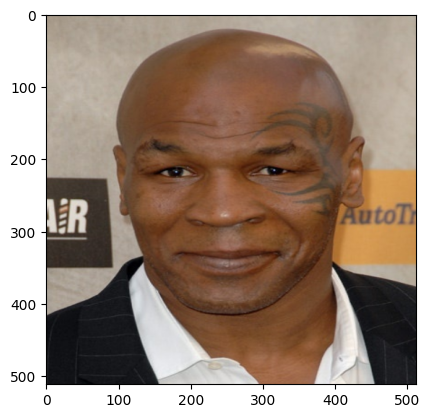

In [35]:
%matplotlib inline

image_pil = transforms.ToPILImage()(samples[0][0])

fig, ax = plt.subplots(1)
ax.imshow(image_pil)
plt.show()


[{'boxes': tensor([[237.5262,  28.3899, 329.0277, 173.4571],
        [233.1382,  99.6121, 306.7244, 170.4449],
        [227.2205, 217.6988, 329.2470, 343.4343],
        [238.4034,  28.7295, 332.3894, 141.5602],
        [235.3507,  22.8591, 328.4887, 117.8428],
        [233.6433,  98.7576, 310.5413, 170.4474],
        [236.3676,  34.1199, 325.1939, 179.8071]], device='cuda:0'), 'labels': tensor([ 5,  2,  7,  3, 17,  1,  6], device='cuda:0'), 'scores': tensor([0.9507, 0.9333, 0.0814, 0.0669, 0.0657, 0.0638, 0.0584],
       device='cuda:0')}, {'boxes': tensor([[211.8890, 173.2486, 394.9718, 355.3024],
        [206.9831,  23.6593, 415.8166, 354.5868],
        [202.0955,  23.7442, 415.0786, 355.6961],
        [199.7699, 175.4181, 407.8224, 391.8983]], device='cuda:0'), 'labels': tensor([1, 5, 6, 7], device='cuda:0'), 'scores': tensor([0.9664, 0.9242, 0.1863, 0.1583], device='cuda:0')}, {'boxes': tensor([[101.4076,  43.6105, 355.0314, 426.7669],
        [159.6400, 212.3308, 357.5187, 424.802

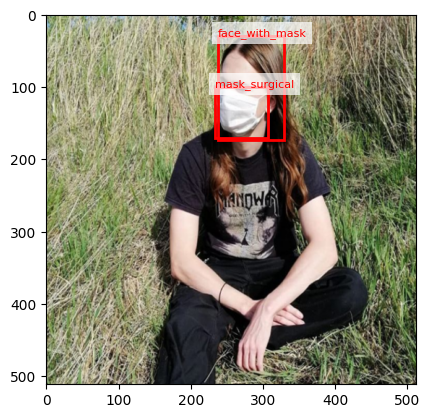

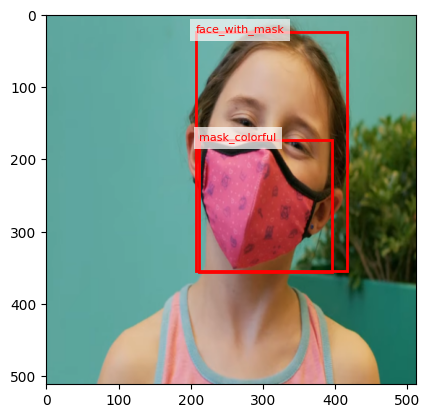

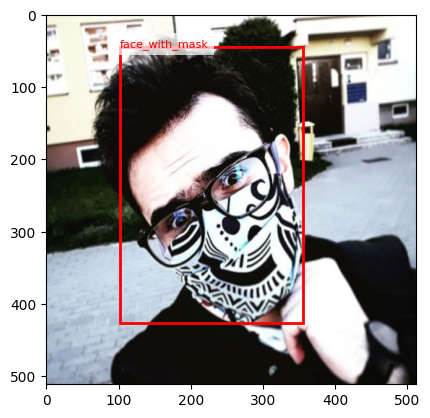

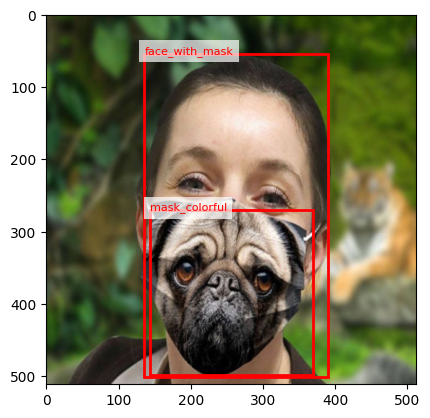

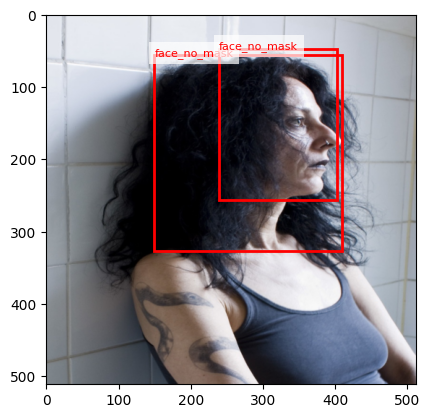

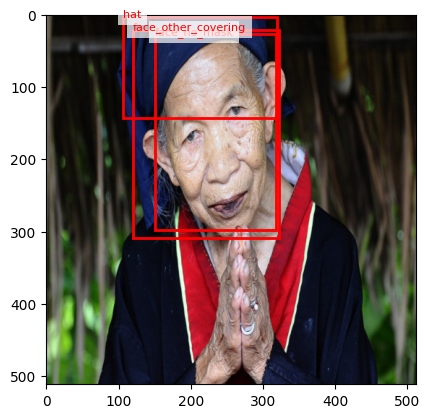

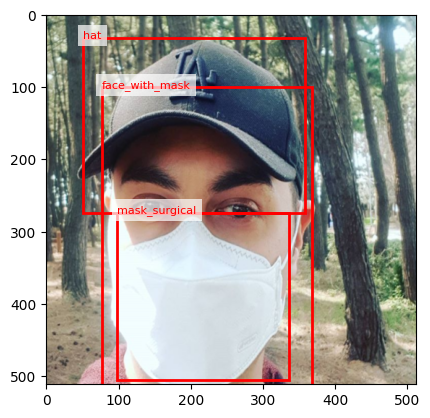

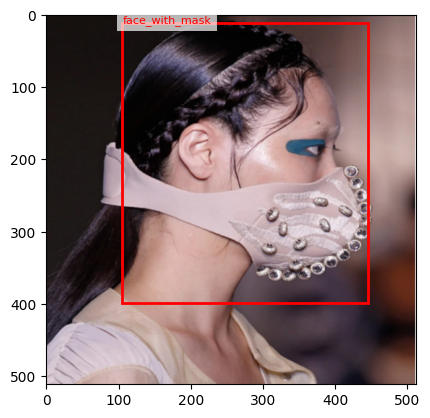

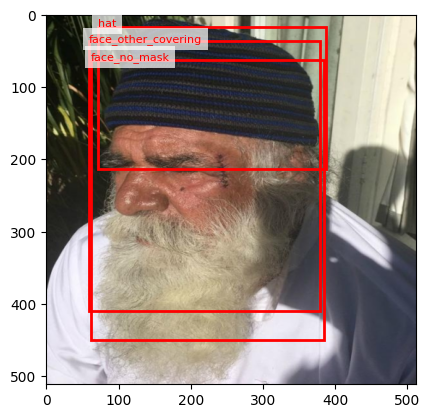

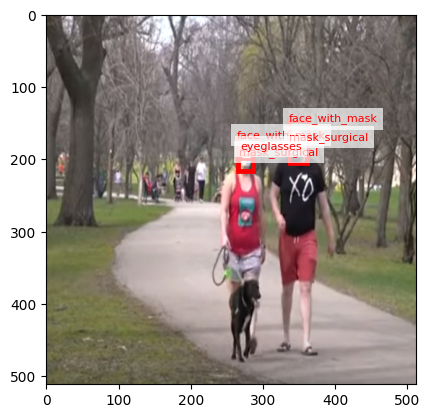

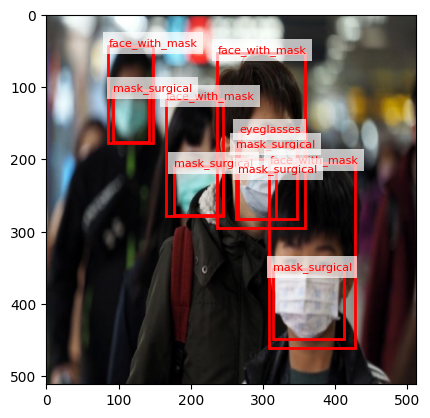

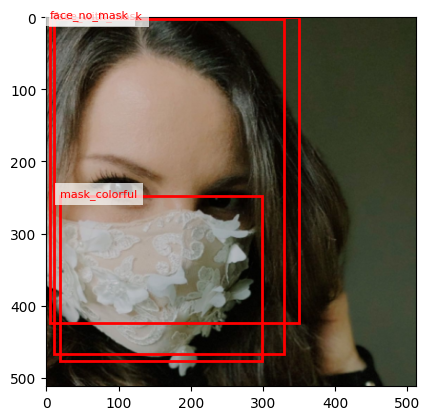

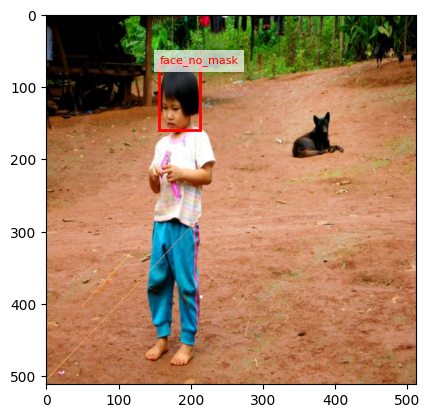

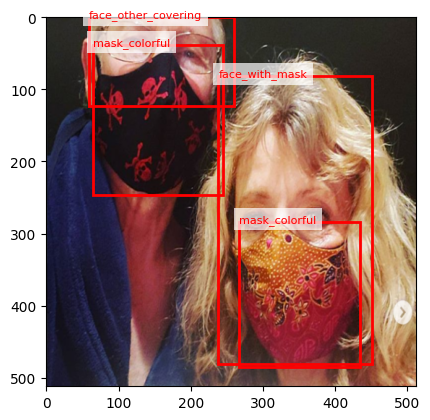

In [58]:
visualize_prediction(samples[0], model, 0.5, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [37]:
model.eval()
model([image.to(device)])

[{'boxes': tensor([[ 94.7061,   1.6414, 434.9565, 385.4115],
          [ 91.0119,  12.7048, 443.8883, 418.0284],
          [ 66.2588,  17.4474, 443.5725, 216.6611]], device='cuda:0',
         grad_fn=<StackBackward0>),
  'labels': tensor([ 3,  6, 17], device='cuda:0'),
  'scores': tensor([0.8299, 0.2307, 0.1552], device='cuda:0', grad_fn=<IndexBackward0>)}]

In [38]:
dataset.__getitem__(1)

(tensor([[[0.9765, 0.9804, 0.9804,  ..., 0.8196, 0.8471, 0.8706],
          [0.9843, 0.9843, 0.9882,  ..., 0.8510, 0.8784, 0.9020],
          [0.9922, 0.9922, 0.9961,  ..., 0.8980, 0.9255, 0.9451],
          ...,
          [0.7333, 0.7333, 0.7176,  ..., 0.2980, 0.2706, 0.2588],
          [0.7294, 0.7333, 0.7216,  ..., 0.2784, 0.2588, 0.2471],
          [0.7255, 0.7333, 0.7294,  ..., 0.2667, 0.2510, 0.2431]],
 
         [[0.9922, 1.0000, 1.0000,  ..., 0.6588, 0.6902, 0.7137],
          [0.9922, 1.0000, 1.0000,  ..., 0.6941, 0.7216, 0.7451],
          [0.9922, 1.0000, 1.0000,  ..., 0.7412, 0.7725, 0.7922],
          ...,
          [0.6941, 0.6980, 0.6902,  ..., 0.1882, 0.1647, 0.1490],
          [0.6902, 0.6980, 0.6980,  ..., 0.1686, 0.1529, 0.1373],
          [0.6863, 0.7020, 0.7020,  ..., 0.1569, 0.1412, 0.1333]],
 
         [[1.0000, 1.0000, 0.9882,  ..., 0.4157, 0.4471, 0.4706],
          [1.0000, 0.9961, 0.9765,  ..., 0.4471, 0.4784, 0.5020],
          [0.9882, 0.9765, 0.9569,  ...,

In [59]:
torch.save(model.state_dict(), "mask_detection_model.pth")
